In [2]:
from imports import *

## Load dataset
Take all the normal data and some abnormal data

In [3]:
# sf = datasets.fetch_kddcup99(subset='SF', random_state=0, percent10=False)
# dfsf = pd.DataFrame(sf.data, columns=sf_columns)
df = pd.read_csv('kddcup.data', delimiter=',')
df.columns = sa_columns + ["target"]

df_normal = df[df["target"]== 'normal.']

target_anomaly_rate = 0.01
df_attacks = df[df["target"]!= 'normal.'].sample(n = int(len(df_normal)*target_anomaly_rate), random_state=1)

df = df_normal.append(df_attacks).sample(frac=1, random_state=1)
anomaly_rate = 1.0 - len(df.loc[df["target"]=='normal.'])/len(df)
print(f"anomaly rate is {anomaly_rate:.1%}")

df['binary_target'] = [1 if x=='normal.' else -1 for x in df["target"]]
toDecode = ["protocol_type", "service", "flag", "target"]
leSF = preprocessing.LabelEncoder()
for f in toDecode:
    df[f] = leSF.fit_transform(df[f])

x_train, x_test, y_train, y_test = train_test_split(df.drop(["target", 'binary_target'], axis=1), df['binary_target'], test_size=0.33, random_state=0)

anomaly rate is 1.0%


In [6]:
def cross_validation(contamination):
    highest_score = 0
    highest_score_c = 0
    #print("array:", contamination)
    for c in contamination:
        y_pred = IsolationForest(random_state=1, n_jobs=-1, max_samples=0.25, n_estimators=100, contamination=c).fit(x_train).predict(x_test)
        p, r, f, s = map(lambda x: x[0], precision_recall_fscore_support(y_test, y_pred, labels=[-1]))
        if p + r > highest_score: highest_score = p + r; highest_score_c = c
        fp = s / p - s
        print(f"contamination: {c}, AUC : {roc_auc_score(y_test, y_pred):.1}, precision: {p}, support: {s}, recall: {r}, fp: {int(round(fp, 0))}")
    return highest_score_c

In [7]:
contamination = [round(0.01 + 0.01*i, 2) for i in range(10)]
c_max = cross_validation(contamination)
c_max

contamination: 0.01, AUC : 0.7, precision: 0.39313984168865435, support: 3316, recall: 0.3594692400482509, fp: 5119
contamination: 0.02, AUC : 0.7, precision: 0.2555521752357773, support: 3316, recall: 0.5066344993968637, fp: 9660
contamination: 0.03, AUC : 1e+00, precision: 0.33559356340451374, support: 3316, recall: 1.0, fp: 6565
contamination: 0.04, AUC : 1e+00, precision: 0.25011313923668727, support: 3316, recall: 1.0, fp: 9942
contamination: 0.05, AUC : 1e+00, precision: 0.20198574648230494, support: 3316, recall: 1.0, fp: 13101
contamination: 0.06, AUC : 1e+00, precision: 0.1682907023954527, support: 3316, recall: 1.0, fp: 16388
contamination: 0.07, AUC : 1e+00, precision: 0.14389862871029335, support: 3316, recall: 1.0, fp: 19728
contamination: 0.08, AUC : 1e+00, precision: 0.12548247937637175, support: 3316, recall: 1.0, fp: 23110
contamination: 0.09, AUC : 1e+00, precision: 0.11213309887731639, support: 3316, recall: 1.0, fp: 26256
contamination: 0.1, AUC : 1e+00, precision: 

0.03

In [8]:
contamination = [round(0.1*i, 1) for i in range(1, 7)]
c_max = cross_validation(contamination)
c_max

contamination: 0.1, AUC : 1e+00, precision: 0.10078414686037324, support: 3316, recall: 1.0, fp: 29586
contamination: 0.2, AUC : 0.9, precision: 0.050439597213349154, support: 3316, recall: 1.0, fp: 62426
contamination: 0.3, AUC : 0.9, precision: 0.03368241424493901, support: 3316, recall: 1.0, fp: 95133
contamination: 0.4, AUC : 0.8, precision: 0.025382342585079837, support: 3316, recall: 1.0, fp: 127326
contamination: 0.5, AUC : 0.8, precision: 0.020343683090080306, support: 3316, recall: 1.0, fp: 159683
contamination: 0.6, AUC : 0.7, precision: 0.016984746509317025, support: 3316, recall: 1.0, fp: 191918


0.1

In [ ]:
contamination = [round(c_max - 0.1 + 0.01*i, 2) for i in range(11)]
c_max = cross_validation(contamination)
c_max

In [10]:
c_max = 0.03

In [11]:
contamination = [round(c_max - 0.01 + 0.001*i, 3) for i in range(11)]
c_max = cross_validation(contamination)
c_max

contamination: 0.02, AUC : 0.7, precision: 0.2555521752357773, support: 3316, recall: 0.5066344993968637, fp: 9660
contamination: 0.021, AUC : 0.7, precision: 0.24245922932602107, support: 3316, recall: 0.5066344993968637, fp: 10361
contamination: 0.022, AUC : 0.7, precision: 0.23509655751469352, support: 3316, recall: 0.5066344993968637, fp: 10789
contamination: 0.023, AUC : 1e+00, precision: 0.3775905260760647, support: 3316, recall: 1.0, fp: 5466
contamination: 0.024, AUC : 1e+00, precision: 0.3775905260760647, support: 3316, recall: 1.0, fp: 5466
contamination: 0.025, AUC : 0.7, precision: 0.23509655751469352, support: 3316, recall: 0.5066344993968637, fp: 10789
contamination: 0.026, AUC : 0.7, precision: 0.23509655751469352, support: 3316, recall: 0.5066344993968637, fp: 10789
contamination: 0.027, AUC : 1e+00, precision: 0.3713741740396461, support: 3316, recall: 1.0, fp: 5613
contamination: 0.028, AUC : 1e+00, precision: 0.3584864864864865, support: 3316, recall: 1.0, fp: 5934
c

0.023

AUC: 99.1%
              precision    recall  f1-score   support

          -1       0.38      1.00      0.55      3316
           1       1.00      0.98      0.99    320912

    accuracy                           0.98    324228
   macro avg       0.69      0.99      0.77    324228
weighted avg       0.99      0.98      0.99    324228



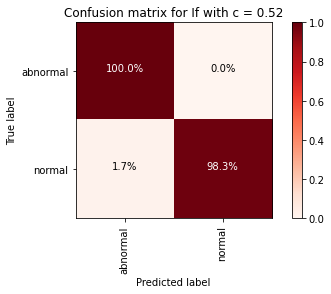

In [12]:
y_pred = IsolationForest(random_state=1, n_jobs=-1, max_samples=0.25, n_estimators=100, contamination=c_max).fit(x_train).predict(x_test)
cm_if = confusion_matrix(y_test, y_pred)
print(f"AUC: {roc_auc_score(y_test, y_pred):.1%}")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(cm_if, f"Confusion matrix for If with c = {0.52}")